In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
plt.rcParams["figure.figsize"] = (20,10)
sns.set()

In [2]:
df = pd.read_csv("NZDep 1991-2013 CAU with TALB2018.csv", na_values=0)

In [3]:
df.columns

Index(['AU2013_V1_', 'AU2013_V_1', 'AREA_SQ_KM', 'LAND_AREA_', 'Shape_Leng',
       'NZDep1991 CAU score', 'NZDep1991 CAU scale', 'NZDep1991 pop',
       'NZDep1996 CAU name', 'NZDep1996 CAU score', 'NZDep1996 CAU scale',
       'NZDep1996 CAU pop', 'NZDep2001 CAU name', 'NZDep2001 CAU scale',
       'NZDep2001 CAU score', 'NZDep2006 CAU name', 'NZDep2006 CAU scale',
       'NZDep2006 CAU score', 'NZDep2013 CAU name', 'NZDep2013 CAU scale',
       'NZDep2013 CAU score', 'TALB2018_V', 'TALB2018_1'],
      dtype='object')

In [4]:
years = ["1991", "1996", "2001", "2006", "2013"]
scores = df[[f"NZDep{year} CAU score" for year in years]]
scales = df[[f"NZDep{year} CAU scale" for year in years]]
display(scores.describe())
display(scales.describe())

NZDep1991 CAU score  NZDep1996 CAU score  NZDep2001 CAU score  \
count          1468.000000          1531.000000          1624.000000   
mean            998.558583           998.706074           997.485837   
std              77.103141            80.304591            81.279356   
min             812.000000           856.000000           858.000000   
25%             940.000000           940.000000           936.000000   
50%             987.000000           982.000000           980.000000   
75%            1046.000000          1041.000000          1041.250000   
max            1313.000000          1377.000000          1322.000000   

       NZDep2006 CAU score  NZDep2013 CAU score  
count          1734.000000          1867.000000  
mean            996.632065           995.086235  
std              79.744490            80.129521  
min             864.000000           850.000000  
25%             936.000000           935.000000  
50%             977.000000           975.000000  
75%            1039.000000          1038.000000  
max            1452.000000          1356.000000

NZDep1991 CAU scale  NZDep1996 CAU scale  NZDep2001 CAU scale  \
count          1468.000000          1531.000000          1624.000000   
mean              5.588556             5.578707             5.573276   
std               2.878533             2.875780             2.869226   
min               1.000000             1.000000             1.000000   
25%               3.000000             3.000000             3.000000   
50%               6.000000             6.000000             6.000000   
75%               8.000000             8.000000             8.000000   
max              10.000000            10.000000            10.000000   

       NZDep2006 CAU scale  NZDep2013 CAU scale  
count          1734.000000          1867.000000  
mean              5.554787             5.500268  
std               2.869371             2.871558  
min               1.000000             1.000000  
25%               3.000000             3.000000  
50%               6.000000             6.000000  
75%               8.000000             8.000000  
max              10.000000            10.000000

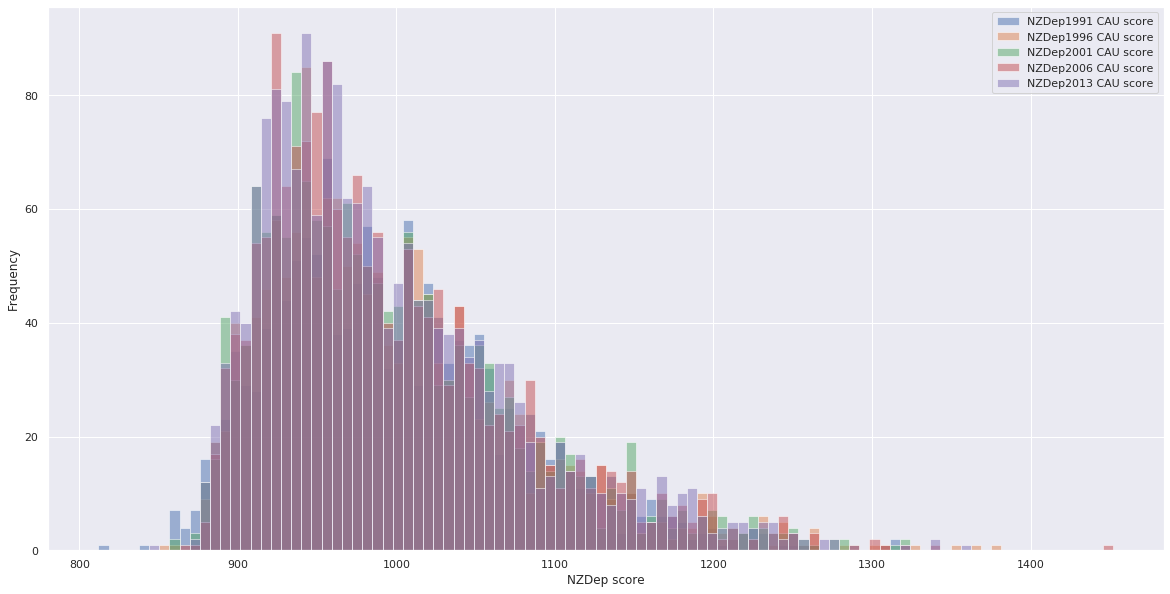

In [5]:
scores.plot.hist(bins=100, alpha=0.5)
plt.xlabel('NZDep score')
plt.show()

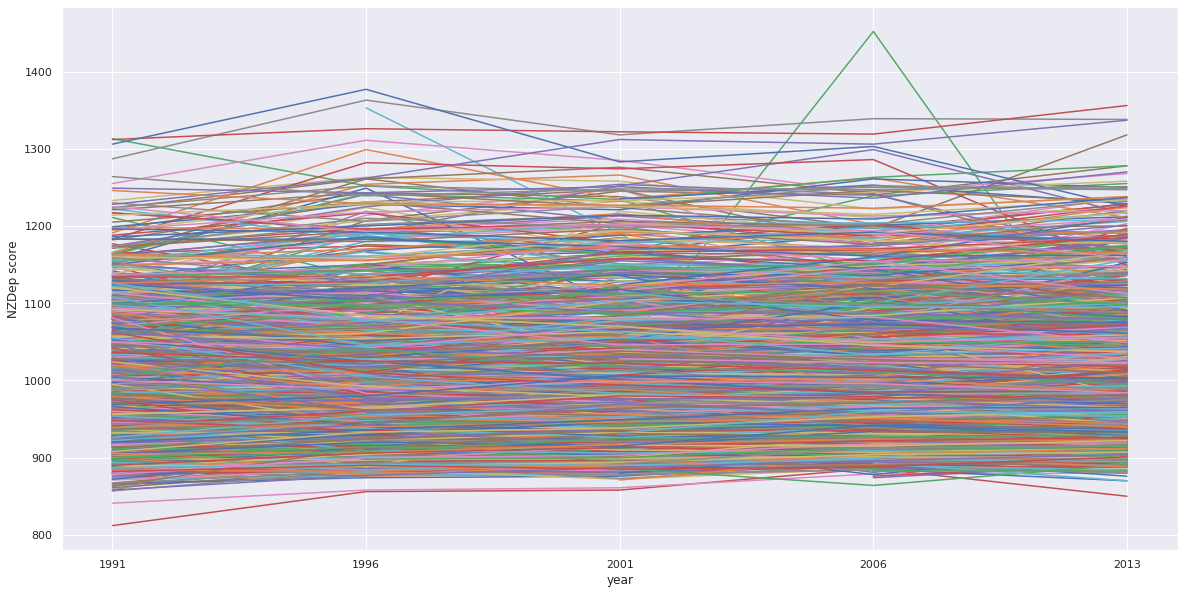

In [6]:
for i, row in df.iterrows():
    plt.plot(years, [row.get(f"NZDep{year} CAU score") for year in years])
plt.xlabel("year")
plt.ylabel("NZDep score")
plt.show()

In [7]:
scores_by_TALB = df.groupby(by="TALB2018_1").mean()[[f"NZDep{year} CAU score" for year in years]]
scores_by_TALB

NZDep1991 CAU score  NZDep1996 CAU score  \
TALB2018_1                                                                     
Albert-Eden Local Board Area                1007.695652           986.125000   
Area Outside Territorial Authority                  NaN                  NaN   
Ashburton District                           973.090909           963.454545   
Buller District                             1070.200000          1075.666667   
Carterton District                           966.250000           959.000000   
...                                                 ...                  ...   
Westland District                            973.714286           996.857143   
Whakatane District                          1056.777778          1082.315789   
Whanganui District                          1036.620690          1043.034483   
Whangarei District                          1021.000000          1019.916667   
Whau Local Board Area                       1010.307692          1005.230769   

                                    NZDep2001 CAU score  NZDep2006 CAU score  \
TALB2018_1                                                                     
Albert-Eden Local Board Area                 984.708333           982.083333   
Area Outside Territorial Authority                  NaN                  NaN   
Ashburton District                           953.545455           964.727273   
Buller District                             1051.733333          1037.533333   
Carterton District                           942.750000           943.250000   
...                                                 ...                  ...   
Westland District                            973.000000           985.789474   
Whakatane District                          1087.210526          1083.421053   
Whanganui District                          1043.068966          1047.275862   
Whangarei District                          1028.918919          1014.372093   
Whau Local Board Area                       1018.153846          1017.000000   

                                    NZDep2013 CAU score  
TALB2018_1                                               
Albert-Eden Local Board Area                 969.958333  
Area Outside Territorial Authority                  NaN  
Ashburton District                           959.625000  
Buller District                             1011.133333  
Carterton District                           946.250000  
...                                                 ...  
Westland District                            967.789474  
Whakatane District                          1070.052632  
Whanganui District                          1057.068966  
Whangarei District                          1031.219512  
Whau Local Board Area                       1018.312500  

[88 rows x 5 columns]

In [8]:
fig = go.Figure()
for i, row in scores_by_TALB.iterrows():
    fig.add_trace(go.Line(x=years, y=[row.get(f"NZDep{year} CAU score") for year in years], name=i))
fig.update_layout(
    title="NZDep over time",
    xaxis_title="year",
    yaxis_title="NZDep score",
    showlegend=False
)

fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [11]:
TALBs = list(df.TALB2018_1.value_counts().keys())
fig = make_subplots(
    rows=len(TALBs), cols=1,
    subplot_titles=TALBs)
for i, TALB in enumerate(TALBs):
    #print(TALB)
    data_for_this_TALB = df[df.TALB2018_1 == TALB][[f"NZDep{year} CAU scale" for year in years]]
    for decile in range(1,11):
        pct = (data_for_this_TALB == decile).sum() / (~pd.isna(data_for_this_TALB)).sum() * 100
        fig.add_trace(go.Bar(x=years, y=pct, name=decile), row=i+1, col=1)
fig.update_layout(barmode='stack', title="NZDep", xaxis_title="year", yaxis_title="%", legend_title="decile", height=len(TALBs) * 200)
fig.show()